<a href="https://colab.research.google.com/github/novita824/PCVK_Genap_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Accesing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

## Fungsi dari Konvolusi

In [66]:
def convolution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  #height dan width dari kernel dan citra padding
  paddingheight, paddingwidth = image.shape
  kernelheight, kernelwidth = kernel.shape

  #menentukan output
  outputheight = (paddingheight - kernelheight) // stride - 1
  outputwidth = (paddingwidth - kernelwidth) // stride - 1

  new_image = np.zeros((outputheight, outputwidth)).astype(np.float32)

  for y in range(0, outputheight):
    for x in range(0, outputwidth):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernelheight, x * stride:x * stride + kernelwidth] * kernel).astype(np.float32)
  return new_image

## Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut:

In [67]:
img = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

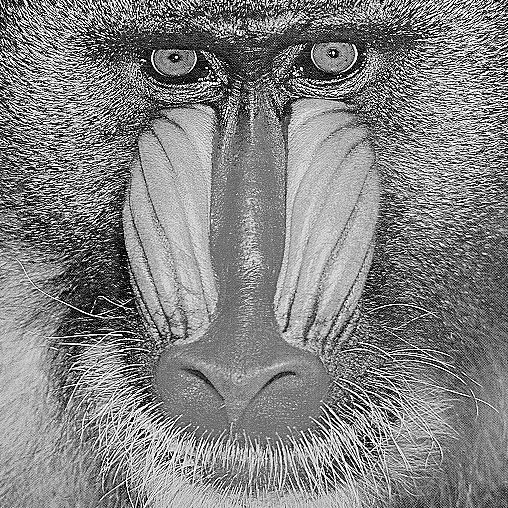

In [68]:
#SHARPEN
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, sharpen,1,0))

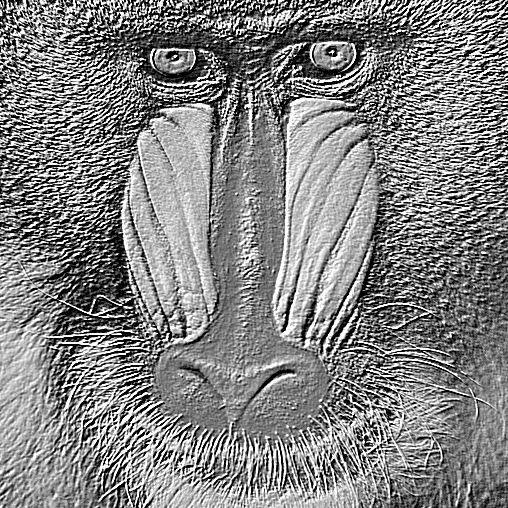

In [69]:
#EMBOSS
emboss = np.array([[-2, -1, 0],
                    [-1, 1, 1],
                    [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, emboss,1,0))

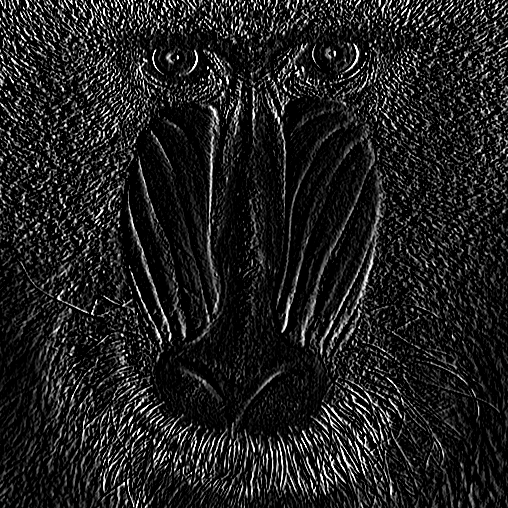

In [70]:
#Left Sobel Edge Detection
leftsobeledgedetection = np.array([[1, 0, -1],
                                  [2, 0, -2],
                                  [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, leftsobeledgedetection,1,0))

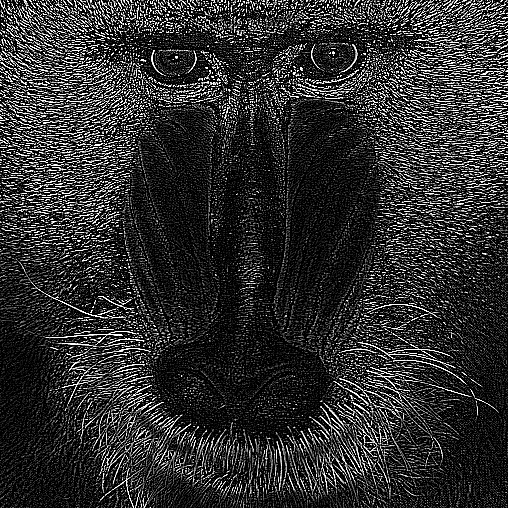

In [71]:
#Canny Edge Detection
cannyedgedetection = np.array([[-1, -1, -1],
                                [-1, 8, -1],
                                [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, cannyedgedetection,1,0))

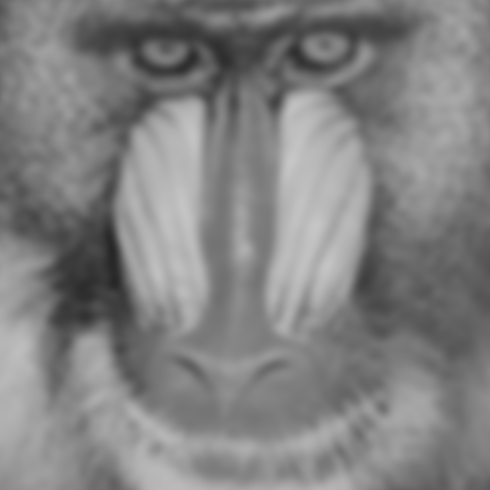

In [72]:
#21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @gaussian_kernel.transpose()
cv2_imshow(convolution2d(img_gray, gauss_kernel,1,0))